## Project by Iryna Granikowska
## Overview
1. Getting and Preparing Data
2. K-Means Cluster Analysis
3. Sampling

 Data set of [public employee compensation in San Francisco](http://data.world/data-society/employee-compensation-in-sf) retrieved from [data.world](http://data.world/). 

 ## Getting and Preparing the Data

In [ ]:
#install nesessary libraries
pip install seaborn
pip install numpy
pip install pandas
pip install matplotlib.pyplot

In [2]:
#import nesessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from io import StringIO
%matplotlib inline

In [4]:
#read the file
output = requests.get('https://github.com/Granikowska/CV_project/raw/master/employee-compensation-sf.csv')
sf = pd.read_csv(StringIO(output.text))
#display all columns
pd.options.display.max_columns = sf.shape[1]
sf.head()

,year_type,year,organization_group_code,organization_group,department_code,department,union_code,union,job_family_code,job_family,job_code,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,4273,NaN,11166.58,2694.49,58242.84,13602.20,8826.10,4423.70,26852.00,85094.84
1,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",9100,Street Transit,9110,Fare Collections Receiver,34336,62811.00,7539.33,8382.41,78732.74,14020.17,12424.50,6469.20,32913.87,111646.61
2,Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,2736,Porter,9890,34355.95,540.07,2783.39,37679.41,5935.65,9157.09,2843.73,17936.47,55615.88
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8214,Parking Control Officer,29625,NaN,251.92,271.44,43438.49,9640.21,8668.97,3512.85,21822.03,65260.52
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8214,Parking Control Officer,44400,NaN,0.00,4380.23,49586.19,10134.36,8987.93,4093.31,23215.60,72801.79


In [12]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 22 columns):
year_type                  11545 non-null object
year                       11545 non-null int64
organization_group_code    11545 non-null int64
organization_group         11545 non-null object
department_code            11545 non-null object
department                 11545 non-null object
union_code                 11545 non-null int64
union                      11545 non-null object
job_family_code            11545 non-null int64
job_family                 11545 non-null object
job_code                   11545 non-null int64
job                        11545 non-null object
employee_identifier        11545 non-null int64
salaries                   11518 non-null float64
overtime                   11545 non-null float64
other_salaries             11545 non-null float64
total_salary               11545 non-null float64
retirement                 11545 non-null float64
health_den

In [13]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11545.0,2015.000000,0.000000,2015.00,2015.0000,2015.00,2015.00,2015.00
organization_group_code,11545.0,2.261498,0.677933,1.00,2.0000,2.00,2.00,4.00
union_code,11545.0,420.637246,255.292170,1.00,253.0000,253.00,790.00,790.00
job_family_code,11545.0,7176.890429,3025.277179,1400.00,2700.0000,9100.00,9100.00,9100.00
job_code,11545.0,7223.365353,3043.388048,1402.00,2736.0000,9163.00,9163.00,9520.00
employee_identifier,11545.0,26981.701516,15477.079882,8.00,13821.0000,26949.00,40547.00,53792.00
salaries,11518.0,49736.141150,27541.464680,-929.88,31422.4425,55943.31,65748.54,304000.40
overtime,11545.0,6650.731180,10159.185800,-236.16,0.0000,2439.69,9247.69,88453.64
other_salaries,11545.0,2760.346831,3172.647970,0.00,569.8500,1674.41,4179.16,63546.94
total_salary,11545.0,59151.851531,33942.798193,0.00,36097.4500,61834.60,78993.23,304000.40


high level analisys shows that data has some nulls in 'salaries' column and unexpected negative values in some columns

In [14]:
#find and drop rows with negative values in numeric columns
sf_num=sf.select_dtypes(include=np.number)
for i in sf_num.columns:
    sf=sf.drop(sf[(sf[i]<0)].index, axis=0)

In [15]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11538.0,2015.000000,0.000000,2015.00,2015.0000,2015.000,2015.0000,2015.00
organization_group_code,11538.0,2.261484,0.677919,1.00,2.0000,2.000,2.0000,4.00
union_code,11538.0,420.590830,255.284997,1.00,253.0000,253.000,790.0000,790.00
job_family_code,11538.0,7177.136419,3025.011862,1400.00,2700.0000,9100.000,9100.0000,9100.00
job_code,11538.0,7223.613971,3043.118252,1402.00,2736.0000,9163.000,9163.0000,9520.00
employee_identifier,11538.0,26985.999047,15473.473633,8.00,13821.2500,26949.000,40551.5000,53792.00
salaries,11511.0,49761.524925,27526.044358,0.00,31460.5700,55943.310,65750.6450,304000.40
overtime,11538.0,6654.796137,10160.926050,0.00,0.0000,2443.035,9248.4350,88453.64
other_salaries,11538.0,2757.710176,3162.687728,0.00,570.0925,1673.285,4175.9675,63546.94
total_salary,11538.0,59178.607019,33932.000081,0.00,36241.5725,61841.475,79022.2950,304000.40


In [17]:
#dealing with missing data on a group leve. 
#replace missing values of salary with the mean value groupped by department and job
sf['salaries'] = sf.groupby(['department', 'job'])['salaries'].transform(
    lambda grp: grp.fillna(np.mean(grp)))

In [18]:
#no null values reterned
sf[sf['salaries'].isnull()]

,year_type,year,organization_group_code,organization_group,department_code,department,union_code,union,job_family_code,job_family,job_code,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation


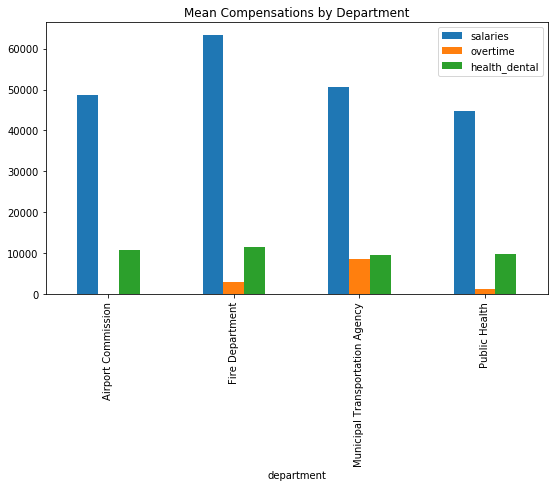

In [19]:
#visualisation. Mean Compensations by Department
grop_department=sf.groupby('department')
visual=grop_department[['salaries','overtime','health_dental']].mean()
visual.plot(kind='bar', title='Mean Compensations by Department', figsize=(9,5))

# K-Means Cluster Analysis 

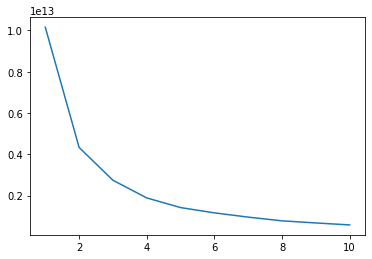

In [20]:
# first need to determine the appropriate value for K
from sklearn.cluster import KMeans
sf_clussters=sf[['salaries','overtime' ,'health_dental']]
w = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 99)
    kmeans.fit(sf_clussters)
    w.append(kmeans.inertia_)
plt.plot(range(1,11), w)

The elbow of plot identifies the approximate point where adding more clusters leads to diminishing returns in reducing within-cluster error. Based on visual observation, elbow appears between 3 and 5 clusters.

In [21]:
#create a function to try different number of clusters
def clustering (df,k):
    kmeans_k = KMeans(n_clusters = k, init = 'k-means++', random_state = 99)
    clusters_k = kmeans_k.fit_predict(df)
    df['cluster'] = clusters_k
    cluster_k_grp = df.groupby('cluster').agg(['mean', 'count'])
    return cluster_k_grp

In [22]:
#trying 3 clusters
for_clustering_check=sf[['salaries', 'overtime', 'health_dental']].copy()
clustering (for_clustering_check,3)

salaries            overtime       health_dental      
                  mean count          mean count          mean count
cluster                                                             
0         15074.054172  3282   1296.923269  3282   3659.944485  3282
1        115632.036587   543  15168.362947   543  12293.566630   543
2         59833.043071  7720   8327.690184  7720  12157.097308  7720

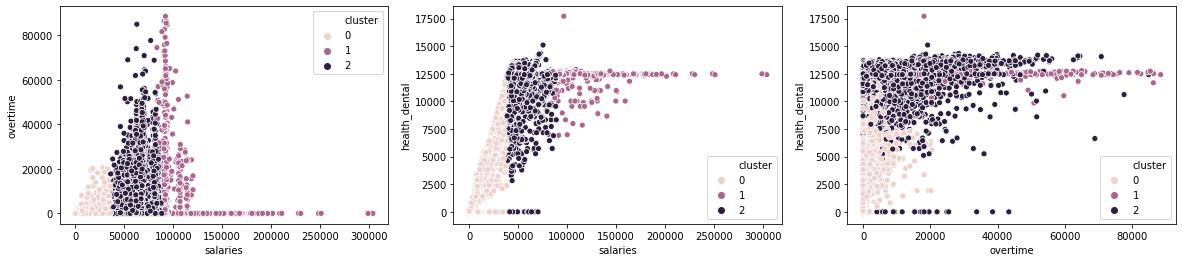

In [23]:
# Set up the axes and figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

# Create 3 scatterplot colored by cluster
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster', data = for_clustering_check, ax = ax1)
sns.scatterplot(x = 'salaries', y = 'health_dental', hue = 'cluster', data = for_clustering_check, ax = ax2)
sns.scatterplot(x = 'overtime', y = 'health_dental', hue = 'cluster', data = for_clustering_check, ax = ax3);

In [24]:
#trying 4 clusters
clustering (for_clustering_check,4)

salaries            overtime       health_dental      
                  mean count          mean count          mean count
cluster                                                             
0         53201.928945  4860   2824.243420  4860  11513.856066  4860
1         12899.365197  2962   1110.716489  2962   3143.862768  2962
2         69337.911969  3435  17113.680387  3435  12736.658125  3435
3        136205.945023   288   3407.757222   288  12223.100833   288

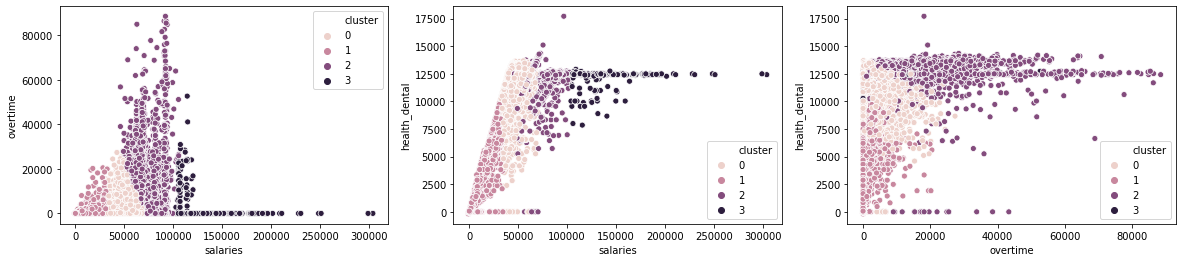

In [25]:
# Set up the axes and figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

# Create 3 scatterplot colored by cluster
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster', data = for_clustering_check, ax = ax1)
sns.scatterplot(x = 'salaries', y = 'health_dental', hue = 'cluster', data = for_clustering_check, ax = ax2)
sns.scatterplot(x = 'overtime', y = 'health_dental', hue = 'cluster', data = for_clustering_check, ax = ax3);

In [26]:
#trying 5 clusters
clustering (for_clustering_check,5)

salaries            overtime       health_dental      
                  mean count          mean count          mean count
cluster                                                             
0         61723.879895  4974   4371.854071  4974  12336.084950  4974
1          9075.666828  2373    710.256228  2373   2248.911500  2373
2         69950.520705  1773  25736.859064  1773  12782.410587  1773
3        136422.998128   285   2813.090035   285  12198.073825   285
4         38653.444162  2140   3232.929678  2140   9207.531383  2140

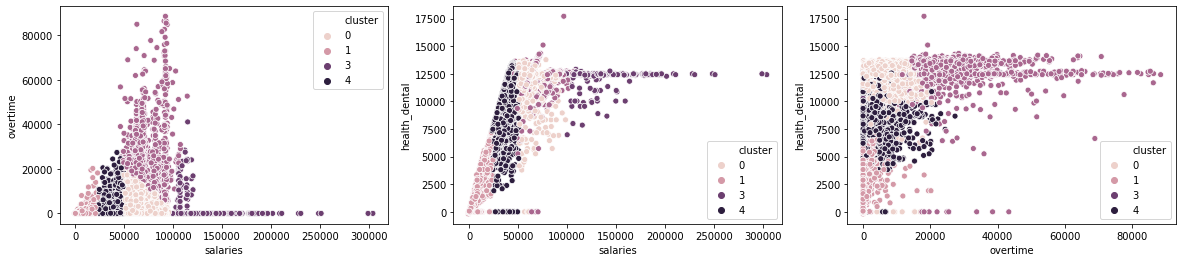

In [27]:
# Set up the axes and figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

# Create 3 scatterplot colored by cluster
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster', data = for_clustering_check, ax = ax1)
sns.scatterplot(x = 'salaries', y = 'health_dental', hue = 'cluster', data = for_clustering_check, ax = ax2)
sns.scatterplot(x = 'overtime', y = 'health_dental', hue = 'cluster', data = for_clustering_check, ax = ax3);

With 3 clusters, we can see a drastic difference in the salaries across each group. Cluster 0 has the lowest salary, overtime, and the least health/dental benefits. Cluster 1 has the highest salary, and likely represents the management 
Visually, it seems that the addition of a 5th cluster has split the lowest salary/overtime group into one with a mean salary of 9,075 and another with a mean salary of 38,653. There is a good chance that this split has separated part time workers from low wage/full time workers.

# Sampling

In [28]:
# Count number of records by agency
sf.groupby('department').count()

,year_type,year,organization_group_code,organization_group,department_code,union_code,union,job_family_code,job_family,job_code,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation
department,,,,,,,,,,,,,,,,,,,,,
Airport Commission,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248
Fire Department,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Municipal Transportation Agency,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759,8759
Public Health,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519


In [29]:
# Because Fire Department has 19 records, select 19 random record from each department
sf_sample=sf.groupby('department').apply(lambda x: x.sample(19,random_state=111))
sf_sample

year_type  year  organization_group_code  \
department                                                          
Airport Commission 423    Calendar  2015                        2   
                   6121     Fiscal  2015                        2   
                   5924     Fiscal  2015                        2   
                   7586   Calendar  2015                        2   
                   6421   Calendar  2015                        2   
...                            ...   ...                      ...   
Public Health      10626  Calendar  2015                        4   
                   3233     Fiscal  2015                        4   
                   3633     Fiscal  2015                        4   
                   1013   Calendar  2015                        4   
                   73       Fiscal  2015                        4   

                                               organization_group  \
department                                                          
Airport Commission 423    Public Works, Transportation & Commerce   
                   6121   Public Works, Transportation & Commerce   
                   5924   Public Works, Transportation & Commerce   
                   7586   Public Works, Transportation & Commerce   
                   6421   Public Works, Transportation & Commerce   
...                                                           ...   
Public Health      10626                         Community Health   
                   3233                          Community Health   
                   3633                          Community Health   
                   1013                          Community Health   
                   73                            Community Health   

                         department_code          department  union_code  \
department                                                                 
Airport Commission 423               AIR  Airport Commission         790   
                   6121              AIR  Airport Commission         790   
                   5924              AIR  Airport Commission         790   
                   7586              AIR  Airport Commission         790   
                   6421              AIR  Airport Commission         790   
...                                  ...                 ...         ...   
Public Health      10626             DPH       Public Health         250   
                   3233              DPH       Public Health         250   
                   3633              DPH       Public Health         250   
                   1013              DPH       Public Health         790   
                   73                DPH       Public Health         790   

                                                      union  job_family_code  \
department                                                                     
Airport Commission 423     SEIU - Miscellaneous, Local 1021             1400   
                   6121    SEIU - Miscellaneous, Local 1021             1400   
                   5924    SEIU - Miscellaneous, Local 1021             2700   
                   7586    SEIU - Miscellaneous, Local 1021             2700   
                   6421    SEIU - Miscellaneous, Local 1021             2700   
...                                                     ...              ...   
Public Health      10626  SEIU - Health Workers, Local 1021             2700   
                   3233   SEIU - Health Workers, Local 1021             2700   
                   3633   SEIU - Health Workers, Local 1021             1400   
                   1013    SEIU - Miscellaneous, Local 1021             1400   
                   73      SEIU - Miscellaneous, Local 1021             1400   

                                             job_family  job_code  \
department                                                          
Airport Commission 423    Clerical, Secretarial & Steno      

In [30]:
# Calculate the mean, standard deviation, and sample size
M=np.mean(sf_sample['salaries'])
SD=np.std(sf_sample['salaries'])
nb_rec=sf_sample['salaries'].count()
print("Mean = ",M)
print("SD = ",SD)
print("Number of records = ",nb_rec)

Mean =  50576.43078947368
SD =  21070.71286046044
Number of records =  76


In [31]:
#Calculating the Minimum Sample Size. 
#Is sample size is enough to estimate the average upper salary range within ± $5,000 and 95% confidence
# Calculate z-scores for a 95% CI
z_upper=stats.norm.interval(0.95)[1]
z_upper
#level of error
E=5000
#recommended minimum sample size
n=((z_upper*SD)/E)**2
print(n)

68.2204580460406


In [32]:
#Sample size is enough. 
# Calculate the confidence interval
stats.norm.interval(0.95, loc=np.mean(sf_sample['salaries']), scale=stats.sem(sf_sample['salaries']))

(45807.7671735312, 55345.09440541615)

 It is 95% confident that the population mean for the salaries is between 47,807.76 and 55,345.09.

In [33]:
#population mean
np.mean(sf['salaries'])

49733.42002286909